# TP: Import, gestion et exploration de données météorologiques

Le but du TP est de comparer les températures de deux stations météo distante de 50 à 200 km
environ (par exemple Toulouse et Agen), ou séparée par des montagnes (Nancy et Strasbourg).
Le code devra être écrit pour qu’en changeant l’import des données son exécution fournisse tous les
résultats, avec les bons titres, légendes ...


## Pré-traitement
### P.1 Librairies

In [1]:
## Scientific libraries
##=====================

## Plot libraries
##===============

### P.2 Quelques codes

## I. Récupération des données
### I.1 Sur climascope

*Si vous n'avez pas accès à climascope, deux jeux de données sont fournis*

***Objectif*** Récupérer des données d'observations sur climascope

1. Aller sur le site [climascope](http://climascope.meteo.fr/)
2. Aller dans l'onglet "Suivi climatique"
3. Choisir le domaine
4. Choisir la variable
5. Choisir le pas de temps
6. Choisir "tableau pour une station"
7. Selectionnez la période de temps pour couvrir une saison
8. Vérifier le paramètre et le type de poste
9. Recherchez par nom la station qui vous interesse, puis selectionnez "Afficher le tableau"
10. Exportez le au format csv, en lui donnant un nom pertinent. (idée: Climascope_nom-de-variable_station_periode-de-temps.csv)

### I.2 Imports dans R
***Objectif*** Écrire une fonction capable d'importer les fichiers csv de climascope, et d'en faire un dataframe "propre". En particulier:

- Le dataframe doit être indéxé par les dates,
- Les dates doivent être au format standard "AAAA-MM-DD"
- Le temps va en ordre croissant avec les index,
- Les noms des colones doivent être compréhensible,
- La fonction `read.csv` permet de relire les fichiers csv, attention aux séparateurs et à la convention pour le séparateur décimal!

In [2]:
####################################
## Écrire votre réponse entre ici...

date_correction = function(t)
{
	return(base::paste( substr(t,1,4) , substr(t,5,6) , substr(t,7,8) , sep = "-" ))
}

load_climascope = function( ifile )
{
	## Load data
	data = read.csv( ifile , sep = ";" , row.names = 1 , dec = "," )
	
	## Remove last column (why exists ?????)
	data = data[,1:9]
	
	## Correct names
	colname = base::c( "TNq" , "Nor_TNq" , "Eca_TNq" , "Nor_TNq_mens" , "min_TNq_mens" , "date_min_TNq_mens" , "max_TNq_mens" , "date_max_TNq_mens" , "Rec_ref_period" )
	names(data) = colname
	
	## Correct temporal axes
	data = data[nrow(data):1,] ## Reverse order of time
	time = rownames(data)
	for( i in 1:length(time) )
	{
		time[i] = date_correction(time[i])
		data$date_min_TNq_mens[i] = date_correction(data$date_min_TNq_mens[i])
		data$date_max_TNq_mens[i] = date_correction(data$date_max_TNq_mens[i])
	}
	rownames(data) = time
	
	return(data)
}

#data_D = subset( data0 , format.Date( row.names(data0) , "%m" ) == "12" )
## ... et la
####################################

In [3]:
pathData = file.path( Sys.getenv("DATAFOLDER") , "Projets/Teaching/ENM/IENM1-S2" )
data0 = load_climascope( "data/Nancy_DJF_2018-2019.csv"      )
data1 = load_climascope( "data/Strasbourg_DJF_2018-2019.csv" )

## II. Exploration graphique

- Tracer les séries temporelles pour les deux stations sur un même graphe. Les données se suivent-elles ?
- Faire un résumé statistique des températures pour chaque station (moyenne, écart-type, médiane,quartile, quantile).
- Tracer les histogrammes des températures des deux stations sur un même graphe (utiliser de la transparence avec la commande `grDevices::rgb`).
- Tracer les boites à moustaches des températures pour les deux stations sur un diagramme commun avec la même échelle.


In [7]:
print(summary(data0))
print(summary(data1))

      TNq             Nor_TNq           Eca_TNq        Nor_TNq_mens    
 Min.   :-7.0000   Min.   :-1.3000   Min.   :-7.000   Min.   :-1.3000  
 1st Qu.:-1.8500   1st Qu.:-1.0750   1st Qu.:-1.175   1st Qu.:-1.0750  
 Median : 0.9500   Median :-0.5000   Median : 1.500   Median :-0.5000  
 Mean   : 0.9089   Mean   :-0.4267   Mean   : 1.340   Mean   :-0.4267  
 3rd Qu.: 4.0750   3rd Qu.: 0.1000   3rd Qu.: 4.475   3rd Qu.: 0.1000  
 Max.   :10.0000   Max.   : 1.1000   Max.   : 9.400   Max.   : 1.1000  
  min_TNq_mens    date_min_TNq_mens   max_TNq_mens   date_max_TNq_mens 
 Min.   :-19.10   Length:90          Min.   :10.10   Length:90         
 1st Qu.:-19.10   Class :character   1st Qu.:10.10   Class :character  
 Median :-16.20   Mode  :character   Median :11.20   Mode  :character  
 Mean   :-17.06                      Mean   :10.93                     
 3rd Qu.:-15.80                      3rd Qu.:11.40                     
 Max.   :-15.80                      Max.   :11.40              

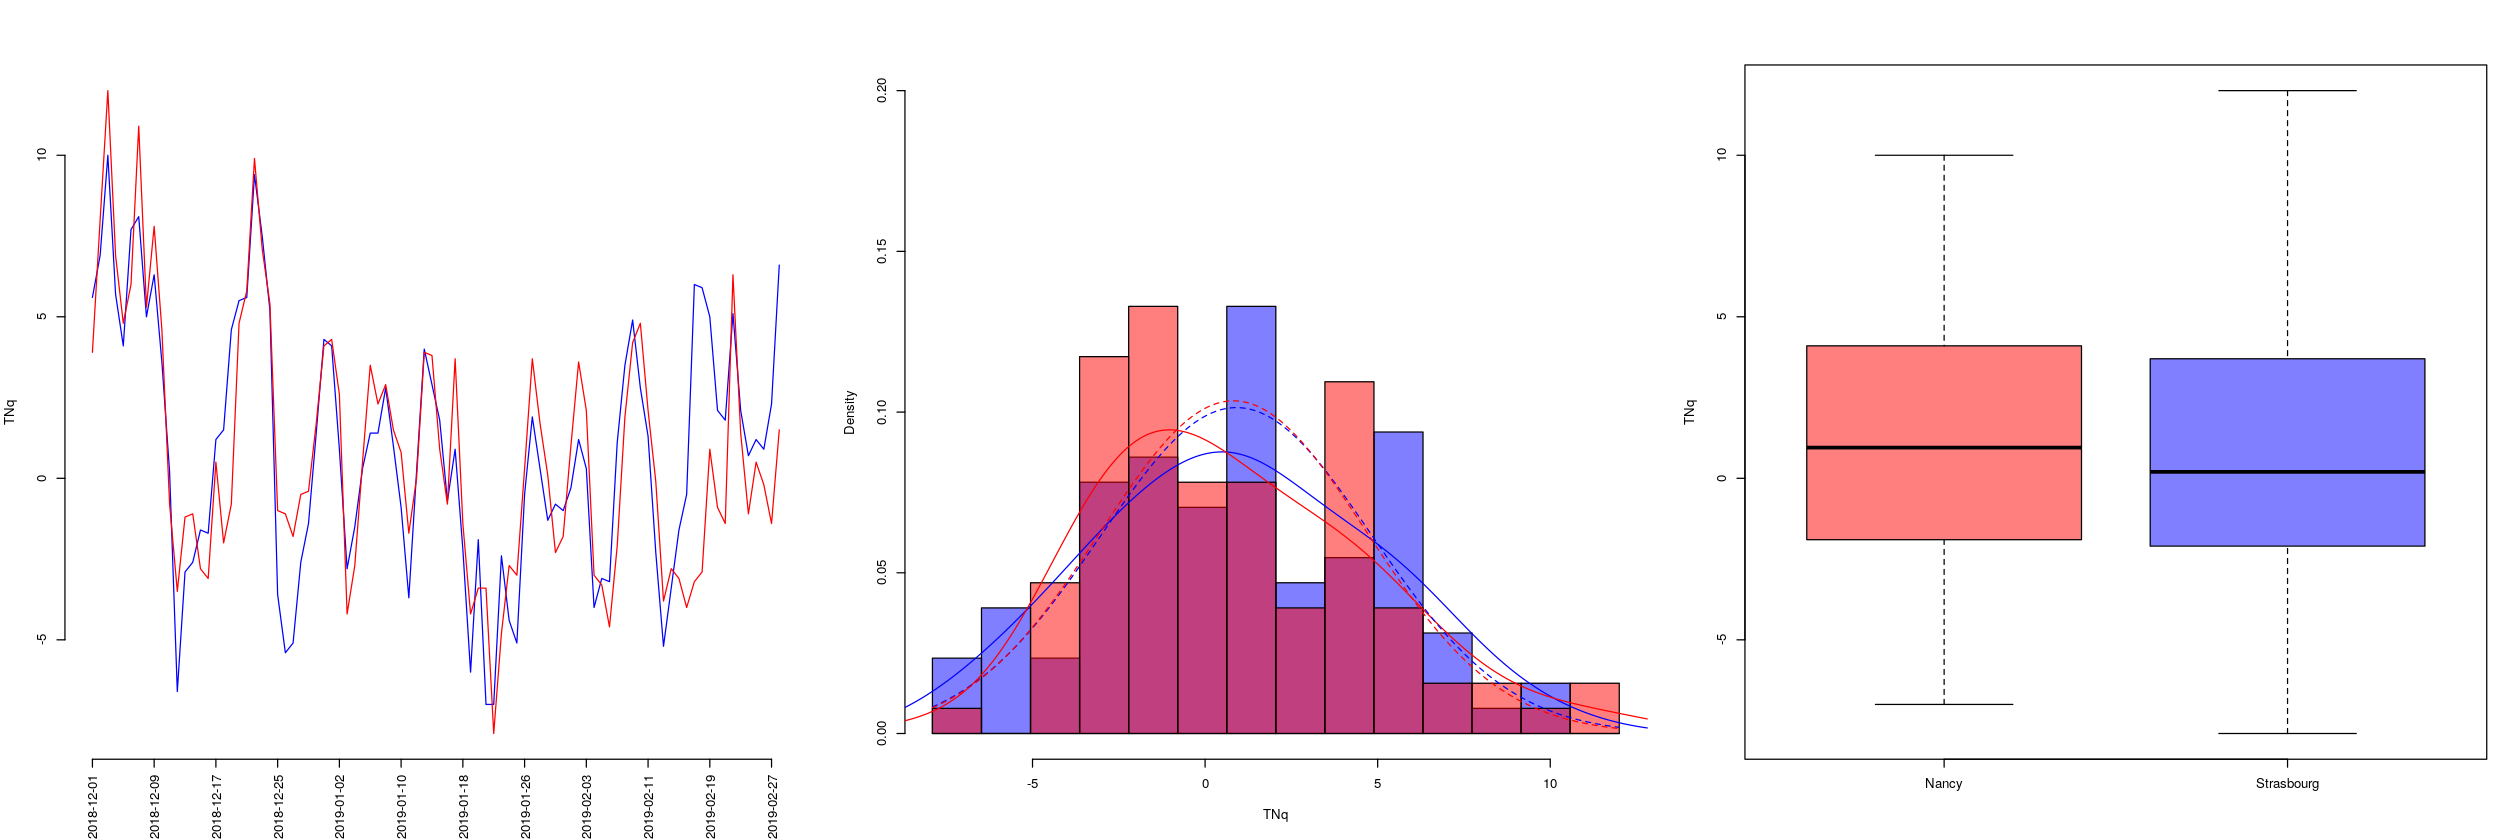

In [18]:
nrow = 1 ## Nombre de lignes de sous-graphique
ncol = 3 ## Nombre de colonnes de sous-graphique
base::options( repr.plot.width = 7 * ncol , repr.plot.height = 7 * nrow )
graphics::par( mfrow = base::c(nrow,ncol) ) ## On construit un graphique découpé en 2 sous fenêtre cote à cote

## Affichage de la série chrono
TNq_range = base::c( min(data0$TNq,data1$TNq) , max(data0$TNq,data1$TNq) )
graphics::plot(  data0$TNq , col = "blue" , type = "l" , ylim = TNq_range , ylab = "TNq" , axes = FALSE , xlab = "" )
graphics::lines( data1$TNq , col = "red" )
graphics::axis( 1 , at = seq( 1 , 90 , 8 ) , labels = rownames(data0)[seq( 1 , 90 , 8 )] , las = 2 )
graphics::axis(2)

x = base::seq( TNq_range[1] , TNq_range[2] , length = 15 )
ylim = base::c(0,0.2)
graphics::hist( data0$TNq , breaks = x , freq = FALSE , col = grDevices::rgb(0,0,1,0.5) , ylim = ylim , xlab = "TNq" , main = "" )
graphics::hist( data1$TNq , breaks = x , freq = FALSE , col = grDevices::rgb(1,0,0,0.5) , add = TRUE )
graphics::lines( density(data0$TNq,bw=2) , col = "blue" )
graphics::lines( density(data1$TNq,bw=2) , col = "red" )
x = base::seq( TNq_range[1] , TNq_range[2] , length = 200 )
graphics::lines( x , dnorm( x , mean = mean(data0$TNq) , sd = sd(data0$TNq) ) , col = "blue" , lty = 2 )
graphics::lines( x , dnorm( x , mean = mean(data1$TNq) , sd = sd(data1$TNq) ) , col = "red"  , lty = 2 )

graphics::boxplot( cbind( data0$TNq , data1$TNq ) , col = base::c(grDevices::rgb(1,0,0,0.5),grDevices::rgb(0,0,1,0.5)) , names = base::c("Nancy","Strasbourg") , ylab = "TNq" )

## III. Tests statistiques

Effectuez des tests de comparaison de variance (`stats::var.test`) et de moyenne (`stats::t.test`). Vérifiez quel test est réalisé par R.

In [20]:
stats::var.test( data0$TNq , data1$TNq )


	F test to compare two variances

data:  data0$TNq and data1$TNq
F = 1.0419, num df = 89, denom df = 89, p-value = 0.8469
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.6858183 1.5828500
sample estimates:
ratio of variances 
          1.041896 


In [25]:
stats::t.test( x = data0$TNq , y = data1$TNq )


	Welch Two Sample t-test

data:  data0$TNq and data1$TNq
t = 0.14928, df = 177.93, p-value = 0.8815
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.059032  1.232365
sample estimates:
mean of x mean of y 
0.9088889 0.8222222 


### V. Suppléments